# Mental health prediction

**problem statement** - The goal of this project is to predict the percentage of disability-adjusted life years (DALYs) caused by mental disorders in different countries and years, based on the prevalence of various mental and substance use disorders. The data set contains information on the prevalence of schizophrenia, bipolar disorder, eating disorders, anxiety disorders, drug use disorders, depressive disorders, and alcohol use disorders for 190 countries from 1990 to 2017, as well as the DALYs due to mental disorders for the same period.

## Data

All the data is taken from [kaggle](https://www.kaggle.com/datasets/programmerrdai/mental-health-dataset).

## Data dictionary

* Entity - Country name
* Code - Abbrevation for country
* Year - Data for the year
* Schizophrenia - Schizophrenia is a serious mental disorder characterized by continuous or relapsing episodes of psychosis.
* Bipolar disorder - Bipolar disorder is a mental health condition that causes extreme changes in mood, energy, and behavior.
* Eating disorders - Eating disorders are serious health conditions that affect both your physical and mental health. They involve problems in how you think about food, eating, weight and shape, and in your eating behaviors [More about eating disorders](https://www.mayoclinic.org/diseases-conditions/eating-disorders/symptoms-causes/syc-20353603).
* Anxiety disorders - Anxiety disorder is a term that covers a range of mental health conditions that involve excessive fear or nervousness [More about anxiety disordres](https://www.psychiatry.org/patients-families/anxiety-disorders/what-are-anxiety-disorders).
* Drug usage disordres - Drug usage disorder is a condition that affects a person’s brain and behavior, leading to their inability to control their use of substances like legal or illegal drugs, alcohol, or medications.
* Depressive disorders - Depressive disorder can have various causes, such as genetic factors, brain chemistry, life events, stress, trauma, or medical conditions. It can also occur along with other mental disorders, such as anxiety disorders, substance use disorders, or eating disorders.
* Alcohol usage disorders - Alcohol usage disorders are a type of mental health condition that involve excessive or harmful consumption of alcohol [More about alcohol usage disorders](https://www.mayoclinic.org/diseases-conditions/alcohol-use-disorder/symptoms-causes/syc-20369243).
* DALYs (Disability adjusted life years) - Disability-adjusted life years (DALYs) are a way of measuring the impact of diseases and injuries on the health and well-being of a population. DALYs combine the years of life lost due to premature death and the years of life lived with disability or reduced quality of life. One DALY is equal to one year of healthy life lost. DALYs can be used to compare the burden of different diseases, risk factors, or interventions across countries and regions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
# For stats
from scipy import stats
from scipy.stats import norm, skew

# Models
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
df1=pd.read_csv('prevalence-by-mental-and-substance-use-disorder.csv')
df2=pd.read_csv('mental-and-substance-use-as-share-of-disease.csv')
df=pd.merge(df1, df2)

In [3]:
df.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.228979                          
1                                           0.228120                          
2                                           0.227328                          
3                                           0.226468                          
4                                           0.225567                          

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.721207                             
1                                           0.719952                             
2                                           0.718418                             
3                                           0.717452                             
4                                           0.717012                             

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.131001                             
1                                           0.126395                             
2                                           0.121832                             
3                                           0.117942                             
4                                           0.114547                             

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           4.835127                              
1                                           4.821765                              
2                                           4.801434                              
3                                           4.789363                              
4                                           4.784923                              

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.454202                               
1                                           0.447112                               
2                                           0.441190                               
3                                           0.435581                               
4                                           0.431822                               

   Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           5.125291                                 
1                                           5.116306                                 
2                                           5.106558                                 
3                                           5.100328                                 
4                                           5.099424                                 

   Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.444036                                  
1                                           0.444250                                  
2                                           0.445501                                  
3                                           0.445958                                  
4                                           0.445779                                  

   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
0                                           1.696670                                                
1                                           1.734281                                                
2                        

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 11 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           6840 non-null   object 
 1   Code                                                                                             6150 non-null   object 
 2   Year                                                                                             6840 non-null   int64  
 3   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                         6840 non-null   float64
 4   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                      6840 non-null   float64
 5   Preval

In [5]:
df.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)                      0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (P

In [6]:
# Dropping the cols
df.drop('Code', axis=1, inplace=True)
df.head()

Entity  Year  \
0  Afghanistan  1990   
1  Afghanistan  1991   
2  Afghanistan  1992   
3  Afghanistan  1993   
4  Afghanistan  1994   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.228979                          
1                                           0.228120                          
2                                           0.227328                          
3                                           0.226468                          
4                                           0.225567                          

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.721207                             
1                                           0.719952                             
2                                           0.718418                             
3                                           0.717452                             
4                                           0.717012                             

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.131001                             
1                                           0.126395                             
2                                           0.121832                             
3                                           0.117942                             
4                                           0.114547                             

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           4.835127                              
1                                           4.821765                              
2                                           4.801434                              
3                                           4.789363                              
4                                           4.784923                              

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.454202                               
1                                           0.447112                               
2                                           0.441190                               
3                                           0.435581                               
4                                           0.431822                               

   Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           5.125291                                 
1                                           5.116306                                 
2                                           5.106558                                 
3                                           5.100328                                 
4                                           5.099424                                 

   Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.444036                                  
1                                           0.444250                                  
2                                           0.445501                                  
3                                           0.445958                                  
4                                           0.445779                                  

   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
0                                           1.696670                                                
1                                           1.734281                                                
2                                           1.791189   

In [7]:
# Setting the names of columns
df=df.set_axis(['Country', 'Year', 'Schizophrenia', 'Bipolar disorder', 'Food', 'Anxiety', 'Drug usage', 'Depression', 'Alcohol usage', 'mental health'], axis=1)
df.head()

Country  Year  Schizophrenia  Bipolar disorder      Food   Anxiety  \
0  Afghanistan  1990       0.228979          0.721207  0.131001  4.835127   
1  Afghanistan  1991       0.228120          0.719952  0.126395  4.821765   
2  Afghanistan  1992       0.227328          0.718418  0.121832  4.801434   
3  Afghanistan  1993       0.226468          0.717452  0.117942  4.789363   
4  Afghanistan  1994       0.225567          0.717012  0.114547  4.784923   

   Drug usage  Depression  Alcohol usage  mental health  
0    0.454202    5.125291       0.444036       1.696670  
1    0.447112    5.116306       0.444250       1.734281  
2    0.441190    5.106558       0.445501       1.791189  
3    0.435581    5.100328       0.445958       1.776779  
4    0.431822    5.099424       0.445779       1.712986

In [8]:
df.describe()

Year  Schizophrenia  Bipolar disorder         Food      Anxiety  \
count  6840.000000    6840.000000       6840.000000  6840.000000  6840.000000   
mean   2004.500000       0.281167          0.673891     0.211062     4.327525   
std       8.656074       0.047561          0.258594     0.152559     1.177961   
min    1990.000000       0.191621          0.189344     0.045425     1.974823   
25%    1997.000000       0.255468          0.539791     0.099857     3.567064   
50%    2004.500000       0.287456          0.591893     0.154143     4.094443   
75%    2012.000000       0.304760          0.897248     0.276891     4.797286   
max    2019.000000       0.506018          1.676204     1.136541     9.015948   

        Drug usage   Depression  Alcohol usage  mental health  
count  6840.000000  6840.000000    6840.000000    6840.000000  
mean      0.746708     3.950449       1.578807       4.818062  
std       0.463026     0.921021       0.934655       2.294029  
min       0.225471     1.640902       0.319900       0.215647  
25%       0.423502     3.258977       0.732826       3.006507  
50%       0.646050     3.904117       1.460045       4.679177  
75%       0.890013     4.550505       2.261262       6.387488  
max       3.699504     7.688213       4.698694      13.761517

## EDA

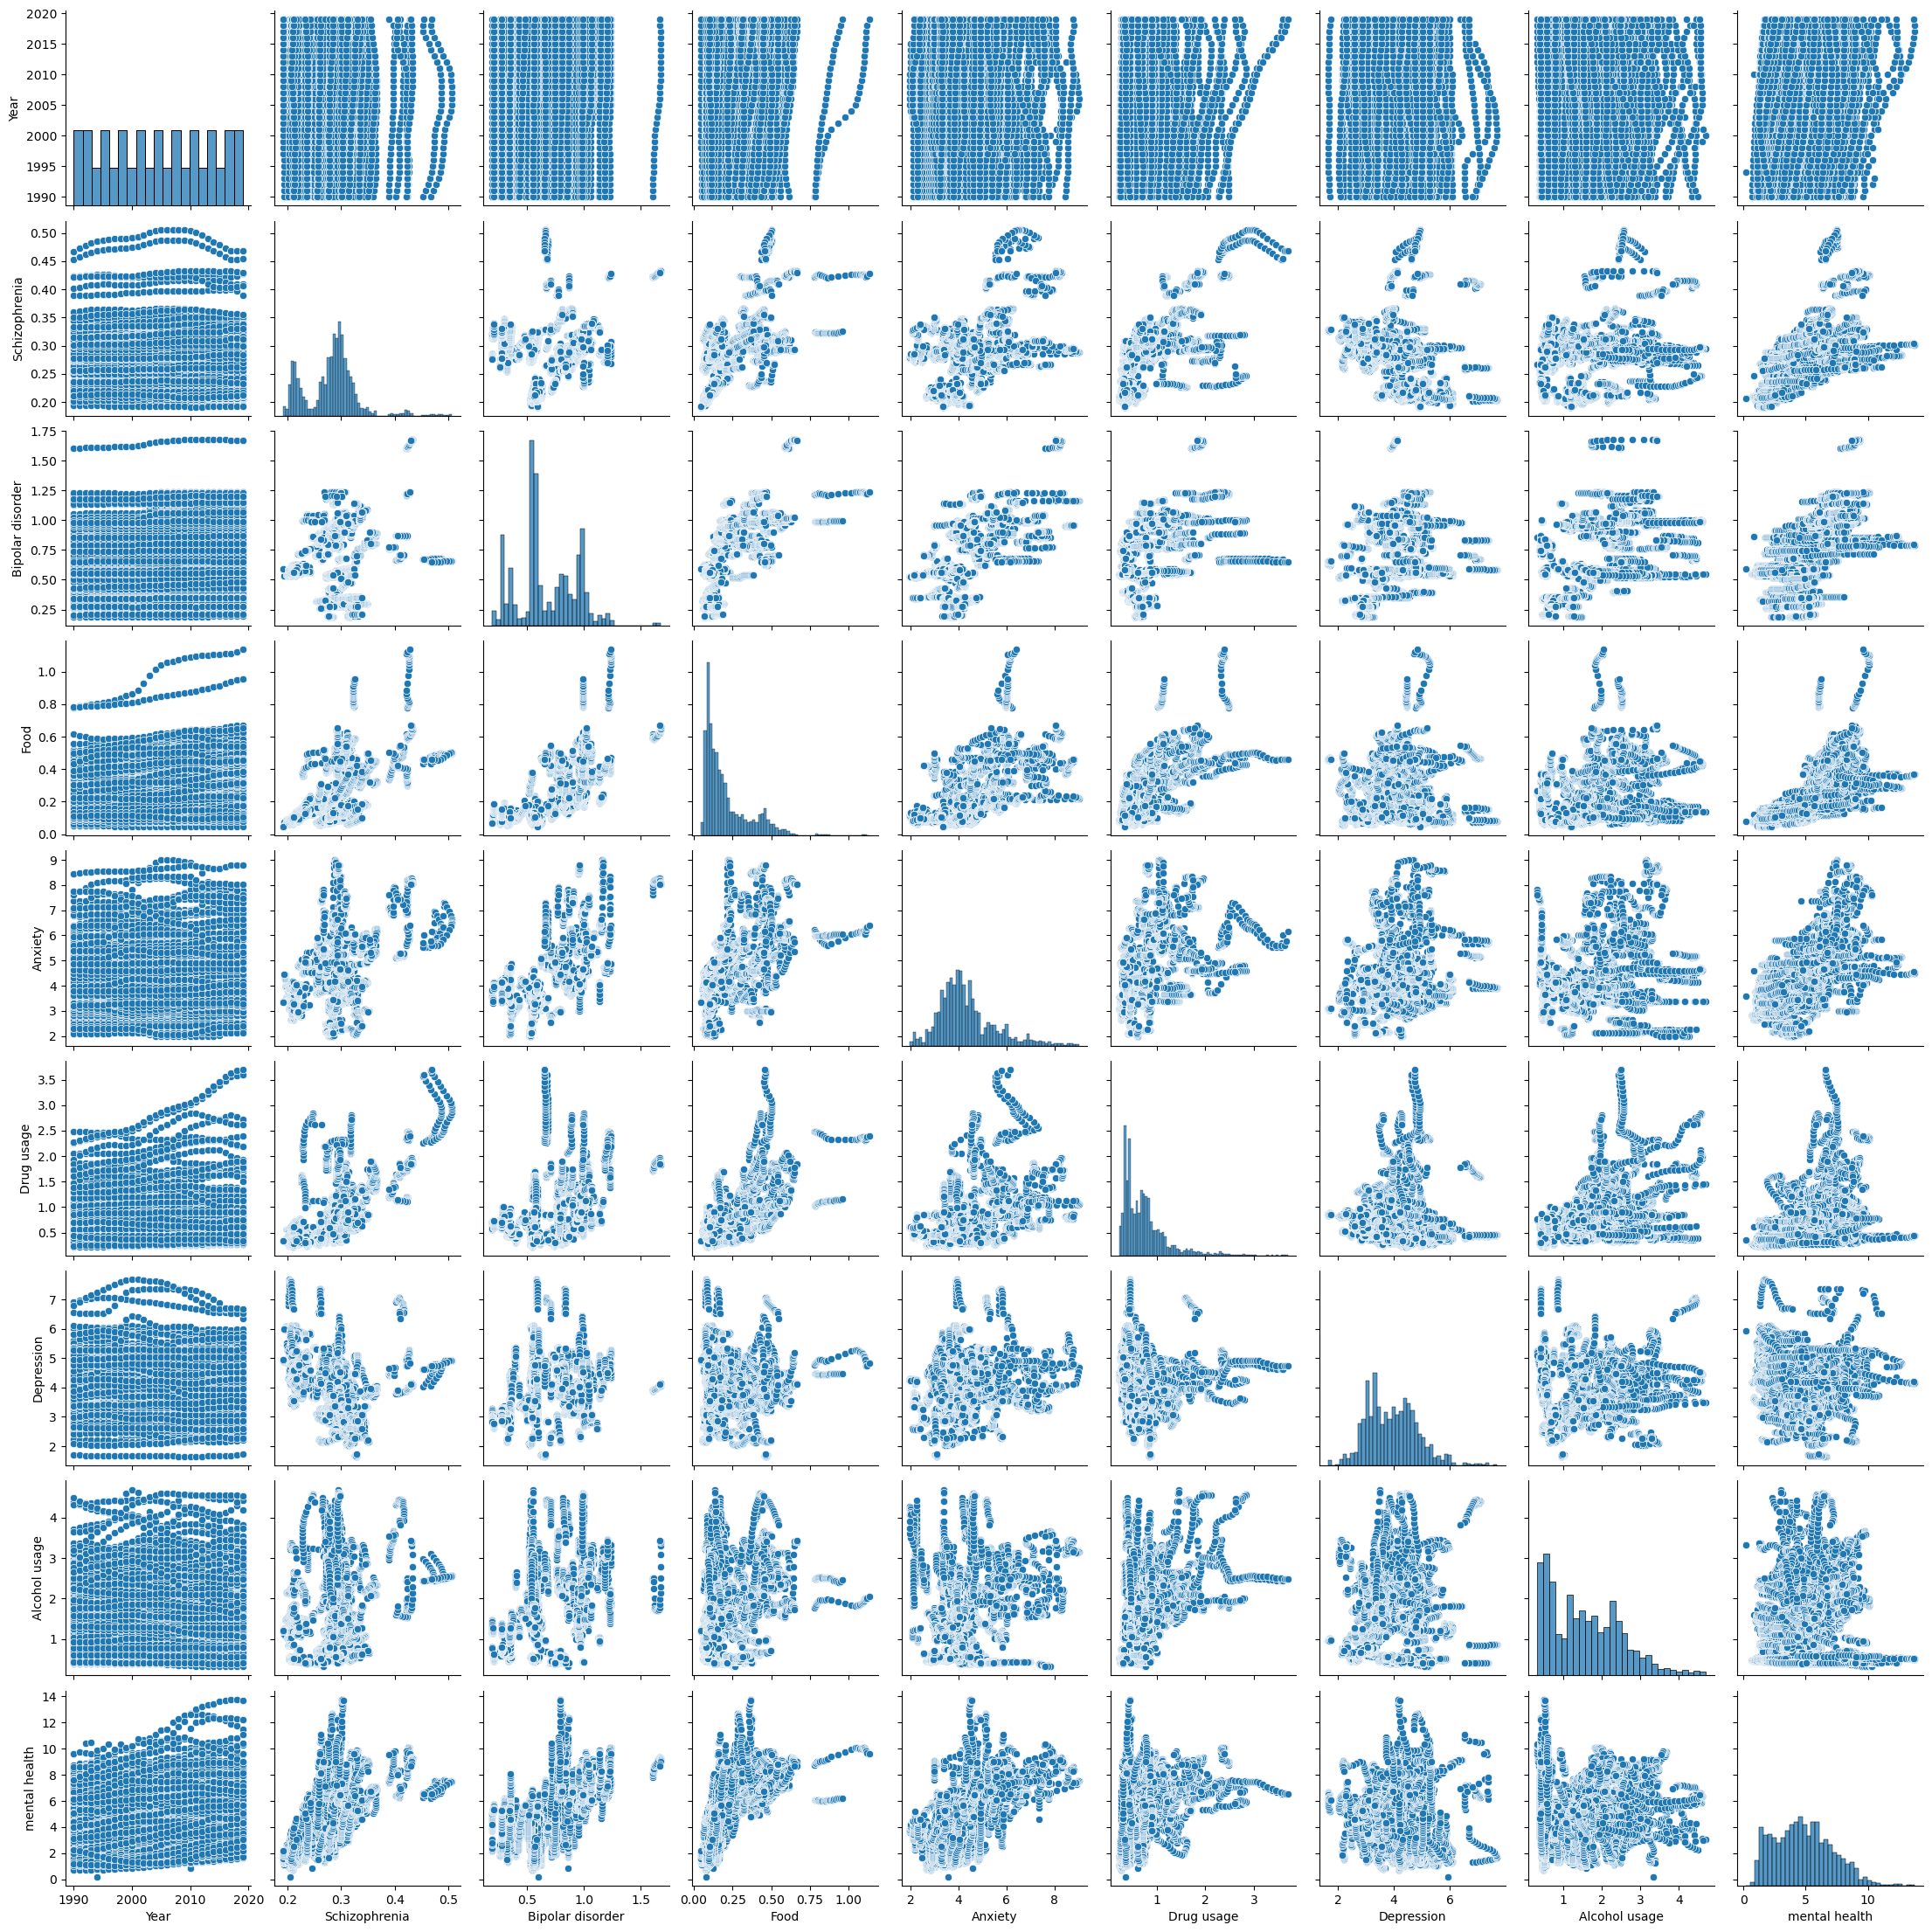

In [9]:
sns.pairplot(df, height=2.5);

In [10]:
fig=px.line(df, x="Year", y="mental health", color='Country',markers=True,color_discrete_sequence=['red','blue'],template='plotly_dark')
fig.show()

In [11]:
fig=px.pie(df, values='mental health', names='Year')
fig.show()

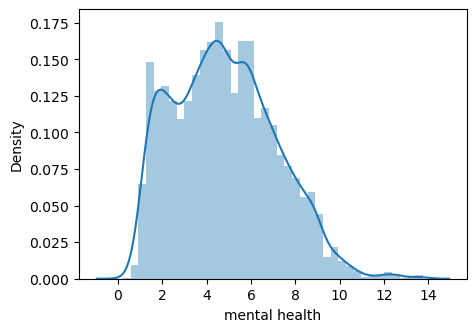

In [12]:
# Distribution of the mental health
plt.figure(figsize=(5, 3.5))
sns.distplot(df['mental health']);

<Figure size 500x400 with 0 Axes>

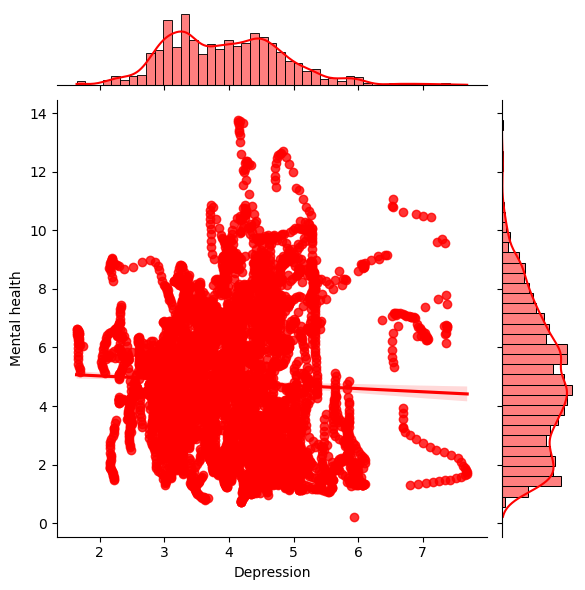

In [13]:
plt.figure(figsize=(5, 4))
sns.jointplot(x='Depression', y='mental health', data=df, color='red', kind='reg')
plt.xlabel('Depression')
plt.ylabel('Mental health');

<Figure size 500x400 with 0 Axes>

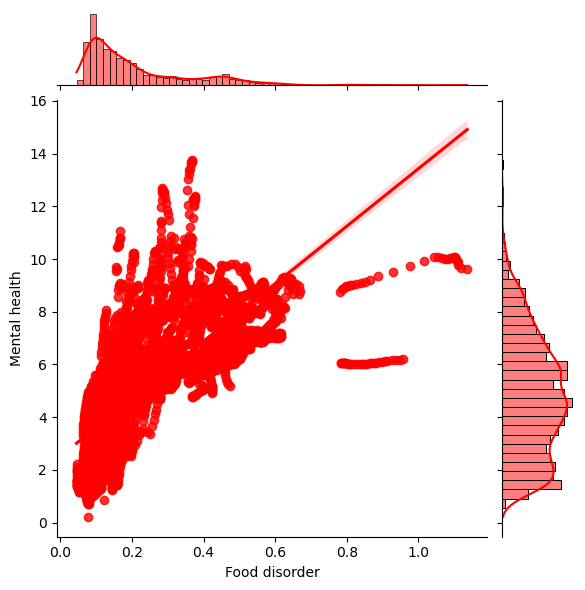

In [14]:
plt.figure(figsize=(5, 4))
sns.jointplot(x='Food', y='mental health', data=df, color='red', kind='reg')
plt.ylabel('Mental health')
plt.xlabel('Food disorder');

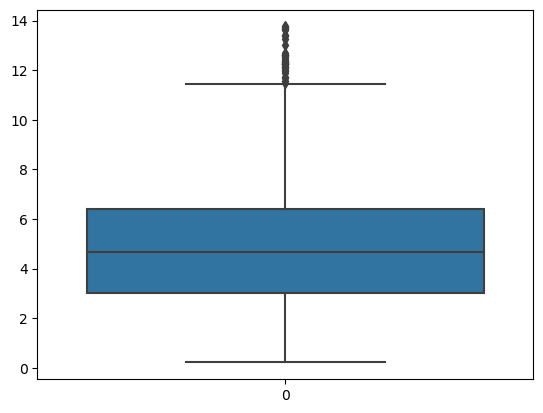

In [15]:
# Checking for outliers
sns.boxplot(df['mental health']);


 mu = 4.82 and sigma = 2.29



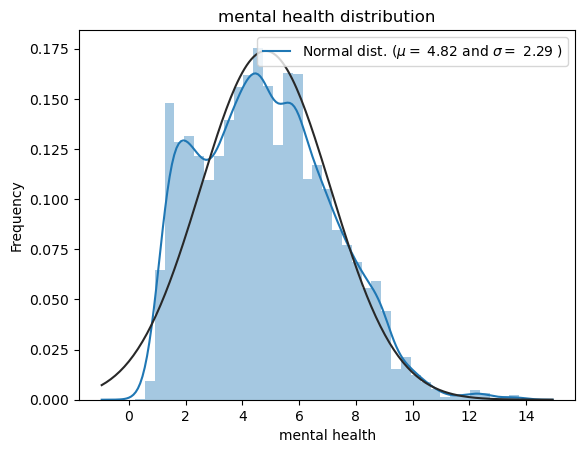

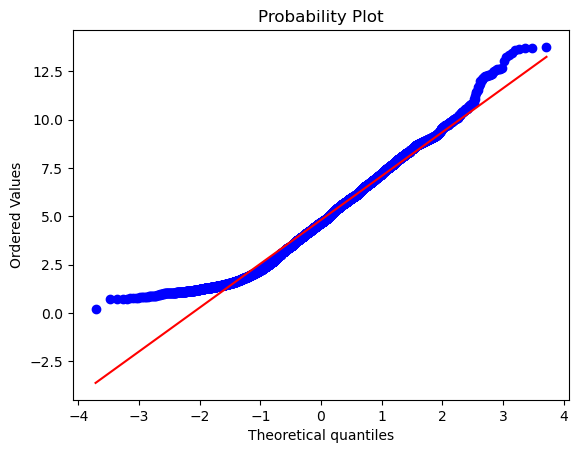

In [16]:
# Finding and handling outliers
sns.distplot(df['mental health'], fit=norm)

(mu, sigma) = norm.fit(df['mental health'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('mental health distribution')

# QQ-plot
fig = plt.figure()
res = stats.probplot(df['mental health'], plot=plt);


 mu = 2.13 and sigma = 0.54



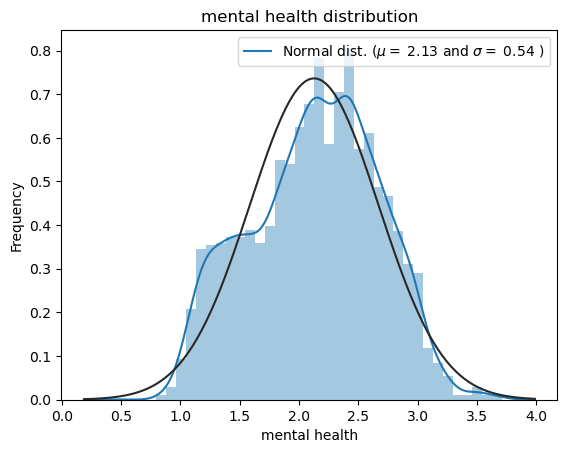

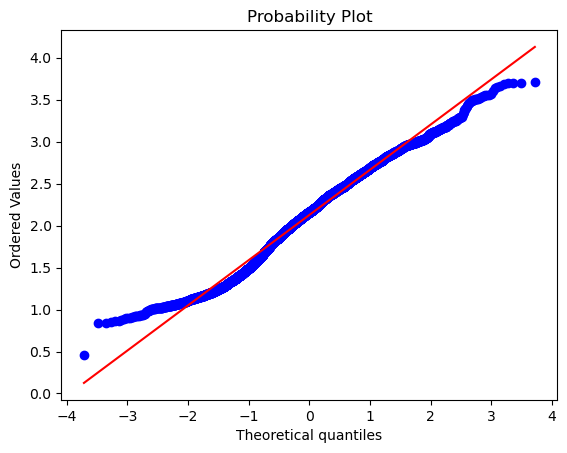

In [17]:
df["mental health"] = np.sqrt(df["mental health"])

sns.distplot(df['mental health'] , fit=norm);

(mu, sigma) = norm.fit(df['mental health'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('mental health distribution')

fig = plt.figure()
res = stats.probplot(df['mental health'], plot=plt)
plt.show()

## Correlation matrix

In [18]:
# Turning the non-numerical data (Country) into numerical data using LabelEncoder
le=LabelEncoder()
df['Country']=le.fit_transform(df['Country'])
df.head()

Country  Year  Schizophrenia  Bipolar disorder      Food   Anxiety  \
0        0  1990       0.228979          0.721207  0.131001  4.835127   
1        0  1991       0.228120          0.719952  0.126395  4.821765   
2        0  1992       0.227328          0.718418  0.121832  4.801434   
3        0  1993       0.226468          0.717452  0.117942  4.789363   
4        0  1994       0.225567          0.717012  0.114547  4.784923   

   Drug usage  Depression  Alcohol usage  mental health  
0    0.454202    5.125291       0.444036       1.302563  
1    0.447112    5.116306       0.444250       1.316921  
2    0.441190    5.106558       0.445501       1.338353  
3    0.435581    5.100328       0.445958       1.332959  
4    0.431822    5.099424       0.445779       1.308811

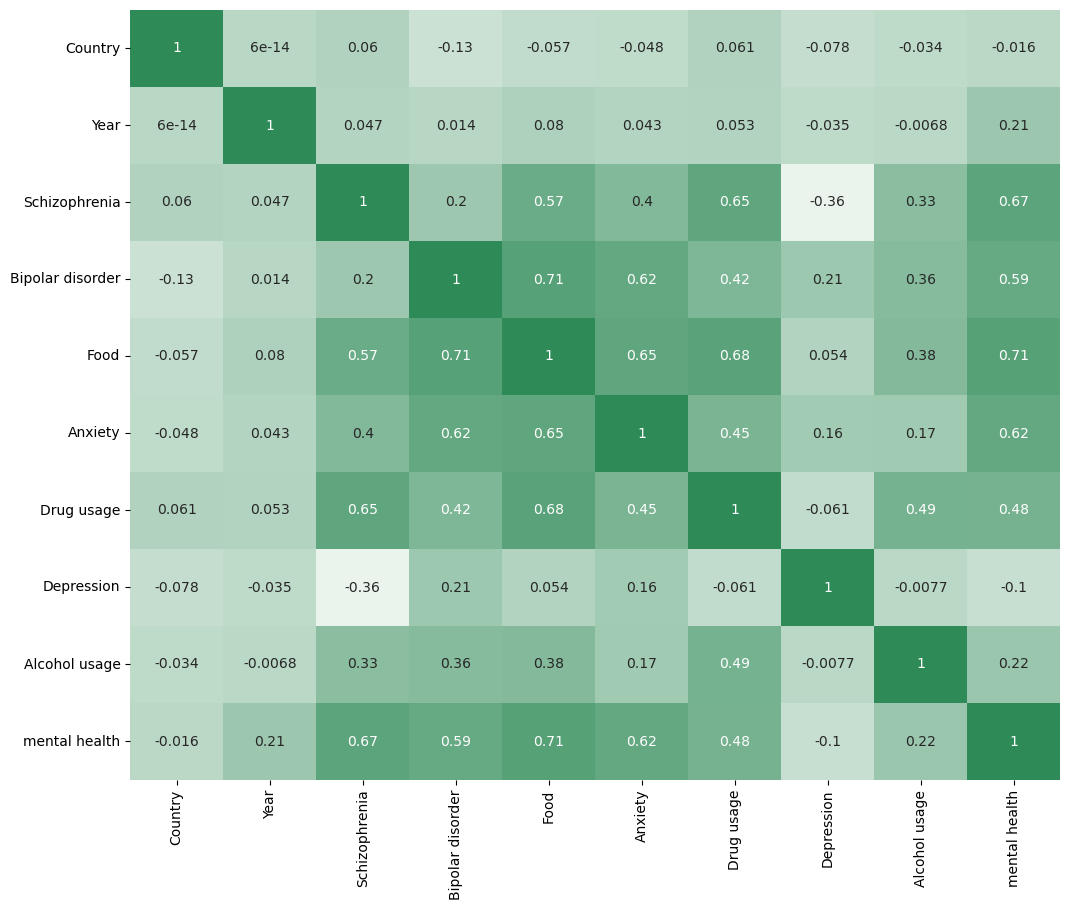

In [19]:
plt.figure(figsize=(12, 10))
coff_mat=df.corr()
cmap=sns.light_palette('seagreen', as_cmap=True)
sns.heatmap(coff_mat, annot=True, cmap=cmap, cbar=False);

## Splitting the data

In [20]:
# Shuffling the data
df=df.sample(frac=1, random_state=42)
# Splitting x and y
x=df.drop('mental health', axis=1)
y=df['mental health']

In [21]:
# Splitting the data in train, valid and test

train_split=round(0.7 * len(df))
valid_split=round(train_split + 0.15 * len(df))
x_train, y_train=x[:train_split], y[:train_split]
x_valid, y_valid=x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test=x[valid_split:], y[valid_split:]

In [22]:
x_train.shape, x_valid.shape, x_test.shape

((4788, 9), (1026, 9), (1026, 9))

In [23]:
y_train.shape, y_valid.shape, y_test.shape

((4788,), (1026,), (1026,))

In [24]:
# Scaling the data

# Creating a list of columns to scale
to_scale=['Schizophrenia', 'Bipolar disorder', 'Food', 'Anxiety', 'Drug usage', 'Depression',	'Alcohol usage']
scaler = StandardScaler()
# Scaling the training, validation and test sets
x_train[to_scale]=scaler.fit_transform(x_train[to_scale])
x_valid[to_scale]=scaler.transform(x_valid[to_scale])
x_test[to_scale]=scaler.transform(x_test[to_scale])

## Model building

### Linear regression

In [25]:
lin_model=LinearRegression()

lin_model.fit(x_train, y_train);

In [26]:
lin_model.score(x_train, y_train)

0.7459742296149237

In [27]:
lin_test_score=lin_model.score(x_test, y_test)
lin_test_score

0.7507829288129058

### Ridge

In [28]:
ridge_model=Ridge()

ridge_model.fit(x_train, y_train);

In [29]:
ridge_model.score(x_train, y_train)

0.7459741581442364

In [30]:
ridge_test_score=ridge_model.score(x_test, y_test)
ridge_test_score

0.7507790519189025

### Random forest reg

In [31]:
rf_model=RandomForestRegressor()

rf_model.fit(x_train, y_train);

In [32]:
rf_model.score(x_train, y_train)

0.9988658049220749

In [33]:
rf_test_score=rf_model.score(x_test, y_test)
rf_test_score

0.9930812668392754

### XGBoost

In [34]:
xgb_model=XGBRegressor()

xgb_model.fit(x_train, y_train);

In [35]:
xgb_model.score(x_train, y_train)

0.9987988181185762

In [36]:
xgb_test_score=xgb_model.score(x_test, y_test)
xgb_test_score

0.9918327347753526

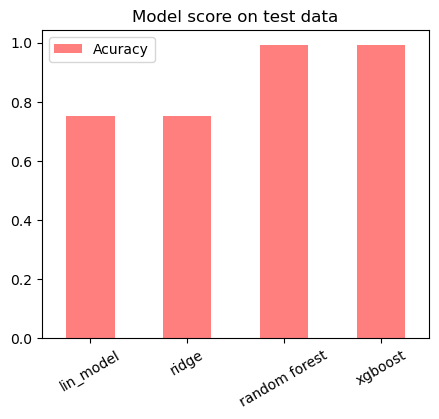

In [37]:
# Scores of all the models
score_dict={'lin_model': lin_test_score,
            'ridge': ridge_test_score,
            'random forest': rf_test_score,
            'xgboost': xgb_test_score}
score_df=pd.DataFrame(score_dict, index=['Acuracy'])
score_df.T.plot(kind='bar', color='red', alpha=0.5, figsize=(5, 4))
plt.xticks(rotation=30)
plt.title('Model score on test data');

## Tuning

In [38]:
# Creating a custom scoring function
def show_scores(y_true, y_preds):
    '''
    Returns a dict of different scores of the model.
    '''
    score_dict={'mean absolute error': mean_absolute_error(y_true, y_preds),
                'mean squared error': mean_squared_error(y_true, y_preds),
                'root mean squared error': np.sqrt(mean_squared_error(y_true, y_preds)),
                'r2_score': r2_score(y_true, y_preds)}
    return score_dict

### Ridge

In [39]:
# Making the predictions on validation set
ridge_model.score(x_valid, y_valid)

0.7295989343099032

In [40]:
ridge_y_preds=ridge_model.predict(x_valid)

In [41]:
print(f'Actual value: {y_valid.iloc[0]}')
print(f'Model predicted value: {ridge_y_preds[0]}')

Actual value: 2.7116634509539086
Model predicted value: 2.756979774789883


In [42]:
show_scores(y_valid, ridge_y_preds)

{'mean absolute error': 0.2139383811143646,
 'mean squared error': 0.08219697704043177,
 'root mean squared error': 0.2867001517970156,
 'r2_score': 0.7295989343099032}

In [43]:
# Tuning the ridge model using RandomSearchCV
ridge_params={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

rf_model=RandomizedSearchCV(ridge_model, param_distributions=ridge_params, cv=5, n_iter=10, n_jobs=-1, verbose=2, random_state=42)
rf_model.fit(x_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [44]:
print(rf_model.best_params_)

{'alpha': 1.0}


In [45]:
rf_model.score(x_train, y_train)

0.7459741581442364

In [46]:
show_scores(y_valid, rf_model.predict(x_valid))

{'mean absolute error': 0.2139383811143646,
 'mean squared error': 0.08219697704043177,
 'root mean squared error': 0.2867001517970156,
 'r2_score': 0.7295989343099032}

### Linear regression

In [47]:
lin_y_preds=lin_model.predict(x_valid)

In [48]:
print('Actual value', y_valid.iloc[0])
print('Model predicted', lin_y_preds[0])

Actual value 2.7116634509539086
Model predicted 2.757173785926934


In [49]:
show_scores(y_valid, lin_y_preds)

{'mean absolute error': 0.21392934763954372,
 'mean squared error': 0.08219516441439945,
 'root mean squared error': 0.28669699059180836,
 'r2_score': 0.729604897254387}

### Random forest

In [50]:
rf_y_preds=rf_model.predict(x_valid)

In [51]:
show_scores(y_valid, rf_y_preds)

{'mean absolute error': 0.2139383811143646,
 'mean squared error': 0.08219697704043177,
 'root mean squared error': 0.2867001517970156,
 'r2_score': 0.7295989343099032}

In [52]:
y_valid.iloc[0], rf_y_preds[0]

(2.7116634509539086, 2.756979774789883)

In [53]:
params={'n_estimators': np.arange(10, 101, 10),
        'max_features': ['log2', 'sqrt', None],
        'max_depth': [None, 3, 5, 7],
        'min_samples_split': np.arange(2, 20, 1),
        'min_samples_leaf': np.arange(1, 20, 1)}

model=RandomForestRegressor(n_jobs=-1)
rs_model=RandomizedSearchCV(model, params, cv=5, n_iter=10, verbose=True, random_state=10)
rs_model.fit(x_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [54]:
print(rs_model.best_params_)

{'n_estimators': 30, 'min_samples_split': 3, 'min_samples_leaf': 15, 'max_features': None, 'max_depth': None}


In [55]:
params={'n_estimators': np.arange(10, 101, 10),
        'max_features': [None],
        'max_depth': [None, 3],
        'min_samples_split': np.arange(10, 15, 1),
        'min_samples_leaf': np.arange(1, 5, 1)}

model=RandomForestRegressor(n_jobs=-1)
gs_model=GridSearchCV(model, params, cv=5, verbose=True)
# Fitting the model
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [None, 3], 'max_features': [None],
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([10, 11, 12, 13, 14]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
             verbose=True)

In [56]:
print(gs_model.best_params_)

{'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 80}


In [57]:
# Making the prediction on validation set
model=RandomForestRegressor(n_estimators=70, 
                            min_samples_leaf=1,
                            max_depth=None, 
                            max_features=None, 
                            min_samples_split=2, 
                            random_state=42)
model.fit(x_train, y_train)
y_val_preds=model.predict(x_valid)

In [58]:
show_scores(y_valid, y_val_preds)

{'mean absolute error': 0.026888722227604876,
 'mean squared error': 0.001929834496615325,
 'root mean squared error': 0.043929881591182614,
 'r2_score': 0.9936514781531003}

In [59]:
print('Actual value', y_valid.iloc[0])
print('Model predicted value', y_val_preds[0])

Actual value 2.7116634509539086
Model predicted value 2.7048334591228507


Making the predictions on test set

In [60]:
# Making the final predictions on test set
y_preds=model.predict(x_test)

In [61]:
# Scores on test set
show_scores(y_test, y_preds)

{'mean absolute error': 0.026454692750392455,
 'mean squared error': 0.0019850736371556524,
 'root mean squared error': 0.04455416520546258,
 'r2_score': 0.9930199862055813}

In [62]:
# model predictions
print('Actual value', y_test.iloc[0])
print('Model predicted value', y_preds[0])

Actual value 2.299588554032923
Model predicted value 2.3122018961993085


### xgboost

In [64]:
xgb_y_preds=xgb_model.predict(x_valid)

In [65]:
show_scores(y_valid, xgb_y_preds)

{'mean absolute error': 0.03118816357618527,
 'mean squared error': 0.002134107073272728,
 'root mean squared error': 0.04619639675637839,
 'r2_score': 0.9929794884472958}

In [66]:
print('Actual value', y_valid.iloc[0])
print('Predicted value', xgb_y_preds[0])

Actual value 2.7116634509539086
Predicted value 2.738698


In [67]:
# Tuning the xgboost model
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': np.arange(50, 101, 10)}

xgb=XGBRegressor(n_jobs=-1)
rs_model=RandomizedSearchCV(xgb, params, cv=5, n_iter=10, verbose=True, scoring='neg_mean_absolute_error', random_state=42)
rs_model.fit(x_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [68]:
print(rs_model.best_params_)

{'subsample': 0.5, 'n_estimators': 90, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.7}


In [69]:
temp_preds=rs_model.predict(x_valid)
show_scores(y_valid, temp_preds)

{'mean absolute error': 0.025256889856322455,
 'mean squared error': 0.0015053112012587205,
 'root mean squared error': 0.038798340186903875,
 'r2_score': 0.9950480204057215}

In [70]:
# Grid search CV
params={'max_depth': [3, 5, 10],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.5],
        'colsample_bytree': np.arange(0.5, 1.0, 0.1),
        'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
        'n_estimators': np.arange(70, 101, 10)}
xgb=XGBRegressor(n_jobs=-1)
gs_model=GridSearchCV(xgb, params, scoring='neg_mean_squared_error', verbose=True, cv=5)
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


In [71]:
print(gs_model.best_params_)

{'colsample_bylevel': 0.8999999999999999, 'colsample_bytree': 0.8999999999999999, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.5}


In [72]:
y_val_preds=gs_model.predict(x_valid)

In [73]:
show_scores(y_valid, y_val_preds)

{'mean absolute error': 0.02415482681707604,
 'mean squared error': 0.001504113251491822,
 'root mean squared error': 0.03878289895678019,
 'r2_score': 0.9950519612671166}

In [74]:
print('Actual value', y_valid.iloc[0])
print('Model value', y_val_preds[0])

Actual value 2.7116634509539086
Model value 2.7169561


In [75]:
# Making the predictions on test set
y_preds_f=gs_model.predict(x_test)

In [76]:
# Scores on test set
show_scores(y_test, y_preds_f)

{'mean absolute error': 0.025836613012740577,
 'mean squared error': 0.00217605617878442,
 'root mean squared error': 0.04664821731625358,
 'r2_score': 0.9923484439765625}

In [77]:
print('Actual value', y_test.iloc[0])
print('Model value', y_preds_f[0])

Actual value 2.299588554032923
Model value 2.331365


## Saving the model

In [78]:
import pickle

In [79]:
pickle.dump(model, open('random_forest_model.pkl', 'wb'))

## Feature importance

In [80]:
model=RandomForestRegressor()
model.fit(x_train, y_train);

In [81]:
feat_imp=dict(zip(df.columns, list(model.feature_importances_)))
feat_imp

{'Country': 0.008897901396680173,
 'Year': 0.03614910446565956,
 'Schizophrenia': 0.2011818014732745,
 'Bipolar disorder': 0.03551731416203409,
 'Food': 0.6184192788741537,
 'Anxiety': 0.03447067688956401,
 'Drug usage': 0.01198456104593316,
 'Depression': 0.01673000642939379,
 'Alcohol usage': 0.0366493552633069}

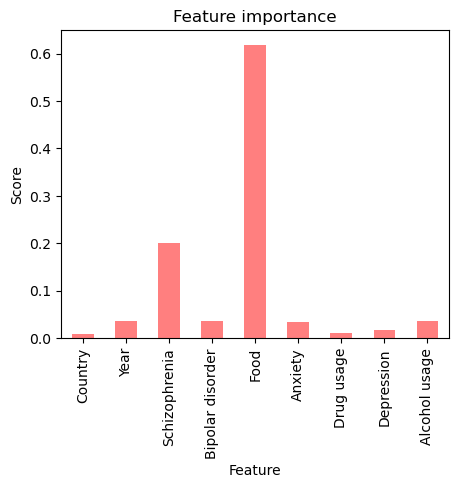

In [82]:
feature_imp=pd.DataFrame(feat_imp, index=[0])
feature_imp.T.plot(color='red', legend=False, kind='bar', alpha=0.5, figsize=(5, 4))
plt.title('Feature importance')
plt.xlabel('Feature')
plt.ylabel('Score');